In [1]:
# 7
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode = True)

In [2]:
diff(cos(x), x)  # 求导数

In [3]:
diff(exp(x ** 2), x)

In [4]:
# diff可以一次取多个导数
diff(x ** 3, x), diff(x ** 3, x, x)

In [5]:
diff(x ** 3, x, 2)  # 求二阶导

In [15]:
expr = exp(x * y * z)
expr

In [16]:
diff(expr, x, y, y, z, z, z, z)

In [17]:
diff(expr, x, 1, y, 2, z, 4)

In [18]:
diff(expr, x, y)  # 先对 x 求导，再对 y 求导

In [19]:
expr.diff(x, y)

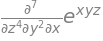

In [20]:
deriv = Derivative(expr, x, y, 2, z, 4)
deriv

In [22]:
deriv.doit()

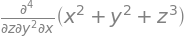

In [21]:
expr1 = x ** 2 + y ** 2 + z ** 3
deriv1 = Derivative(expr1, x, y, 2, z)
deriv1

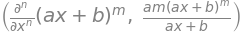

In [26]:
m, n, a, b = symbols('m n a b')
expr = (a * x + b) ** m
expr.diff((x, n)), expr.diff((x, 1))

In [27]:
# 积分
integrate(cos(x), x)

In [28]:
integrate(exp(-x), (x, 0, oo))

In [29]:
# 二重积分
integrate(
    exp(- x**2 - y**2), 
    (x, -oo, oo), 
    (y, -oo, oo))

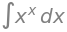

In [31]:
# 如果integrate无法计算积分，则返回一个未计算的 Integral对象
expr = integrate(x ** x, x)
expr

In [33]:
expr = integrate(x * sin(x ** 2), x)
expr

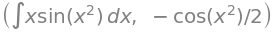

In [37]:
# Integral 不会计算，如果要计算需要用 doit()
expr = Integral(x * sin(x ** 2), x)
expr, expr.doit()

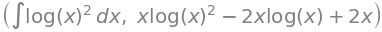

In [38]:
expr = Integral(log(x) ** 2, x)
expr, expr.doit()

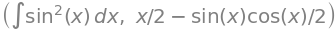

In [41]:
integ = Integral((sin(x)) ** 2, x)
integ, integ.doit()

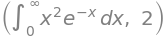

In [44]:
integ = Integral(x ** 2 * exp(-x), (x, 0, oo))
integ, integ.doit()

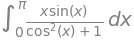

In [53]:
integrate(
    x * sin(x) / (1 + cos(x) ** 2), (x, 0, pi))

In [46]:
# 计算极限
limit(sin(x) / x, x, 0)

In [47]:
limit((1 + 1 / n) ** n, n, +oo)

In [49]:
expr = x ** 2 / exp(x)
expr.subs(x, oo)

nan

In [50]:
limit(expr, x, oo)

In [51]:
limit((cos(x) - 1) / x, x, 0)

In [54]:
limit(1 / x, x, 0, '+')

In [55]:
limit(1 / x, x, 0, '-')

In [56]:
# SymPy 可以计算函数围绕一个点的渐近级数展开
expr = exp(sin(x))
expr.series(x, 0, 4)

In [59]:
expr.series(x, 0, 4).removeO()  # 去掉无穷小项

In [63]:
f, g = symbols('f g', cls = Function)
differentiate_finite(f(x) * g(x))

In [64]:
f = Function('f')
dfdx = f(x).diff(x)
dfdx.as_finite_difference()

In [1]:
# 8
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode = True)

In [2]:
Eq(x, y)

In [4]:
solveset(Eq(x ** 2, 2), x)

In [5]:
solveset(Eq(x ** 2 - 2, 0), x)

In [6]:
solveset(x ** 2 - 2, x)

In [7]:
solveset(x ** 2 - x, x)

In [8]:
solveset(x - x, x, domain = S.Reals)

In [9]:
solveset(sin(x) - 1, x, domain = S.Reals)

In [16]:
solveset(exp(x), x, domain = S.Reals)

In [17]:
solveset(cos(x) - sin(x), x, domain = S.Reals)

In [18]:
solveset(cos(x) - x, x, domain = S.Reals)

In [19]:
solveset(sin(x) - x, x, domain = S.Reals)

In [28]:
# 解线性方程组
linsolve(
    [x + y + z + 1,x - y - z -3, z + x - y - 5], 
    (x, y, z))

In [29]:
linsolve(
    Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), 
    (x, y, z))

In [32]:
# A * x = b 的形式
M = Matrix(((1, 1, 1, 1), 
            (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, x, y, z)

In [35]:
M = Matrix(((1, 1, 1, 0), 
            (1, 1, 2, 0), 
            (2, 3, 4, 1)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, x, y, z)

In [36]:
# 非线性方程组的求解
a, b, c, d = symbols('a b c d', real = True)
nonlinsolve([a ** 2 + a, a - b], [a, b])

In [44]:
nonlinsolve([x ** 2 - y ** 3, x + y], x, y)

In [45]:
nonlinsolve([x ** 2 + 1, y ** 2 + 1], [x, y])

In [46]:
from sympy import sqrt
system = [x ** 2 - 2 * y ** 2 - 2, x * y - 2]
vars = [x, y]
nonlinsolve(system, vars)

In [48]:
system = [exp(x) - sin(y), 1 / y - 3]
nonlinsolve(system, vars)

In [53]:
solveset(x ** 3 - 6 * x ** 2 + 9 * x, x)

In [54]:
roots(x ** 3 - 6 * x ** 2 + 9 * x, x)

In [55]:
f, g = symbols('f g', cls = Function)
f(x)

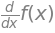

In [56]:
f(x).diff(x)

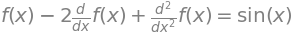

In [57]:
diffeq = Eq(
    f(x).diff(x, x) - 2 * f(x).diff(x) + f(x), 
    sin(x))
diffeq

In [58]:
# 求微分方程
dsolve(diffeq, f(x))

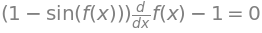

In [67]:
a = Eq(f(x).diff(x) * (1 - sin(f(x))) - 1)
b = dsolve(a, f(x))
a

In [68]:
b

In [4]:
# 9
# 矩阵
import torch
a = torch.tensor([1, 
                  2, 
                  3])
c = a.view(1, 3)
b = torch.tensor([[1, 2, 3]])

In [5]:
a.size(), b.size(), c.size()

(torch.Size([3]), torch.Size([1, 3]), torch.Size([1, 3]))

In [6]:
from sympy import *
init_printing(use_unicode = True)

In [7]:
Matrix([[1, -1], [3, 4], [5, 6]])

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣5  6 ⎦

In [8]:
Matrix([1, 2, 3])

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [11]:
M = Matrix([[1, 2], [3, 4]])
N = Matrix([1, 2])
M, N

⎛⎡1  2⎤  ⎡1⎤⎞
⎜⎢    ⎥, ⎢ ⎥⎟
⎝⎣3  4⎦  ⎣2⎦⎠

In [12]:
M * N

⎡5 ⎤
⎢  ⎥
⎣11⎦

In [16]:
M = Matrix([[1, 2, 3], 
            [4, 5, 6]])
M

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [19]:
M.shape

In [21]:
M.row(0), M.col(-1)

⎛           ⎡3⎤⎞
⎜[1  2  3], ⎢ ⎥⎟
⎝           ⎣6⎦⎠

In [22]:
# 删除列
M.col_del(0)

In [23]:
M

⎡2  3⎤
⎢    ⎥
⎣5  6⎦

In [24]:
# 删除行
M.row_del(0)
M

[5  6]

In [28]:
# 增加行或列
M1 = M.row_insert(1, Matrix([[0, 4]]))
M1

⎡5  6⎤
⎢    ⎥
⎣0  4⎦

In [29]:
M2 = M1.col_insert(2, Matrix([1, 2]))
M2

⎡5  6  1⎤
⎢       ⎥
⎣0  4  2⎦

In [35]:
# 矩阵的运算
M = Matrix([[1, 2], [3, 4]])
N = Matrix([[0, 1], [2, 5]])
M, N

⎛⎡1  2⎤  ⎡0  1⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣3  4⎦  ⎣2  5⎦⎠

In [36]:
M + N, M * N, M - N

⎛⎡1  3⎤  ⎡4  11⎤  ⎡1  1 ⎤⎞
⎜⎢    ⎥, ⎢     ⎥, ⎢     ⎥⎟
⎝⎣5  9⎦  ⎣8  23⎦  ⎣1  -1⎦⎠

In [40]:
3 * M, -1 * M

⎛⎡3  6 ⎤  ⎡-1  -2⎤⎞
⎜⎢     ⎥, ⎢      ⎥⎟
⎝⎣9  12⎦  ⎣-3  -4⎦⎠

In [39]:
M * M, M ** 2

⎛⎡7   10⎤  ⎡7   10⎤⎞
⎜⎢      ⎥, ⎢      ⎥⎟
⎝⎣15  22⎦  ⎣15  22⎦⎠

In [41]:
A = Matrix([[1, 2, 3], [4, 5, 6]])
A

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [42]:
A.T

⎡1  4⎤
⎢    ⎥
⎢2  5⎥
⎢    ⎥
⎣3  6⎦

In [43]:
# 矩阵构造函数
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [44]:
eye(3, 4)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎣0  0  1  0⎦

In [45]:
diag(1, 2, 3)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

In [50]:
diag(
    -1, 
    ones(2, 2), 
    Matrix([[5, 3], [1, 2]]), 
    Matrix([1, 2, 3]))

⎡-1  0  0  0  0  0⎤
⎢                 ⎥
⎢0   1  1  0  0  0⎥
⎢                 ⎥
⎢0   1  1  0  0  0⎥
⎢                 ⎥
⎢0   0  0  5  3  0⎥
⎢                 ⎥
⎢0   0  0  1  2  0⎥
⎢                 ⎥
⎢0   0  0  0  0  1⎥
⎢                 ⎥
⎢0   0  0  0  0  2⎥
⎢                 ⎥
⎣0   0  0  0  0  3⎦

In [51]:
# 行列式
M = Matrix([[1, 2], [3, 4]])
M

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [52]:
M.det()  # 1 * 4 - 2 * 3 = -3

In [57]:
N = Matrix(
    [[1, 0, 1, 3], 
     [2, 3, 4, 7], 
     [-1, -3, -3, -3]])
N

⎡1   0   1   3 ⎤
⎢              ⎥
⎢2   3   4   7 ⎥
⎢              ⎥
⎣-1  -3  -3  -3⎦

In [58]:
# 行最简矩阵
N.rref()

⎛⎡1  0   1   0⎤           ⎞
⎜⎢            ⎥           ⎟
⎜⎢0  1  2/3  0⎥, (0, 1, 3)⎟
⎜⎢            ⎥           ⎟
⎝⎣0  0   0   1⎦           ⎠

In [59]:
# 零 空间
M = Matrix([[1, 2, 3, 0, 0], 
            [4, 10, 0, 0, 1]])
M

⎡1  2   3  0  0⎤
⎢              ⎥
⎣4  10  0  0  1⎦

In [60]:
M.nullspace()

⎡⎡-15⎤  ⎡0⎤  ⎡ 1  ⎤⎤
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 6 ⎥  ⎢0⎥  ⎢-1/2⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 1 ⎥, ⎢0⎥, ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 0 ⎥  ⎢1⎥  ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎣⎣ 0 ⎦  ⎣0⎦  ⎣ 1  ⎦⎦

In [61]:
# 特征值，特征向量，对角化
M = Matrix([[3, -2, 4, -2], 
            [5, 3, -3, -2], 
            [5, -2, 2, -2], 
            [5, -2, -3, 3]])
M

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [62]:
M.eigenvals()
# 这意味着M具有特征值 -2、3 和 5
# 并且特征值 -2 和 3 的代数重数为 1
# 特征值 5 的代数重数为 2

In [64]:
# 特征向量
M.eigenvects()

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟, ⎜5, 2, ⎢⎢ ⎥, ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

In [65]:
# 对角化
M

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [66]:
P, D = M.diagonalize()
P, D  # D 为对角阵

⎛⎡0  1  1  0 ⎤  ⎡-2  0  0  0⎤⎞
⎜⎢           ⎥  ⎢           ⎥⎟
⎜⎢1  1  1  -1⎥  ⎢0   3  0  0⎥⎟
⎜⎢           ⎥, ⎢           ⎥⎟
⎜⎢1  1  1  0 ⎥  ⎢0   0  5  0⎥⎟
⎜⎢           ⎥  ⎢           ⎥⎟
⎝⎣1  1  0  1 ⎦  ⎣0   0  0  5⎦⎠

In [67]:
P * D * P ** -1

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [68]:
lamda = symbols('lamda')
p = M.charpoly(lamda)
factor(p.as_expr())

In [1]:
# 10
from sympy import *
x, y, z = symbols('x y zw')

In [2]:
expr = x ** 2 + x * y
srepr(expr)

"Add(Pow(Symbol('x'), Integer(2)), Mul(Symbol('x'), Symbol('y')))"

In [3]:
x = symbols('x')
srepr(x ** 2)

"Pow(Symbol('x'), Integer(2))"

In [4]:
pow(x, 2)

x**2

In [5]:
type(2)

int

In [8]:
type(sympify(2))

sympy.core.numbers.Integer

In [9]:
Mul(x, y)

x*y

In [10]:
Add(Pow(x, 2), Mul(x, y))

x**2 + x*y

In [11]:
expr = sin(x * y) / 2 - x ** 2 + 1 / y
expr

-x**2 + sin(x*y)/2 + 1/y

In [12]:
srepr(expr)

"Add(Mul(Integer(-1), Pow(Symbol('x'), Integer(2))), Mul(Rational(1, 2), sin(Mul(Symbol('x'), Symbol('y')))), Pow(Symbol('y'), Integer(-1)))"